In [ ]:
# Program for finding the shape of the lipid bilayer with the initial direction of the director

from time import time 
import scipy.optimize
import numpy as np
import matplotlib
import pandas as pd
import csv
from google.colab import drive
import os
import sys

In [ ]:
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Data')
sys.path.append('/content/gdrive/My Drive/final_scripts')

import python_extras.Generall_functions as g_f
import python_extras.Special_functions as s_f
import python_extras.Energy_functions as e_f
import python_extras.Hemifusion as f_s

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%%time

# parameters = (sigma_0, K_t, K_a, K_g, B,   h_0e, h_0i, J_Se, J_Si)
gen_param =  (0.05,     10., 25., 0,   10., 1.5,  1.5,  0.0,  0.0)

x = [20., 4., 4., 10., 8., 10.]
total_lengths = 64., 36.

# left_values = (n_u, n_d, H_u, H_d, H_m)
gen_left_values =  (None, None, None, None, None)
right_values = ((0.3, 0.4, 3.4, 0, 1.7), (0.4, 0.3, 36, 32.6, 34.3))

# Определение номеров точек, отчёт от 1, разделяющих ось на области разных задач
# A, B, C = sep_numbers[0]
# D, E, F, G, H = sep_numbers[1]
sep_numbers = ((24, 25, 60), (68, 79, 87, 98, 106))

# res = scipy.optimize.minimize( f_s.define_lengths_as, x, args = (sep_numbers, gen_left_values, right_values, gen_param, total_lengths) )

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 12.4 µs


In [ ]:
# Определение длины областей различных задач
# A0, AB, BC = lengths[0]
# D0, DE, EF, FG, GH = lengths[1]
lengths = ( (res.x[0], res.x[1], total_lengths[0] - res.x[1] - res.x[0]), (res.x[2], res.x[3], res.x[4], res.x[5],\
total_lengths[1] - res.x[2] - res.x[3] - res.x[4] - res.x[5]) )


# width = h_0e, h_0i
width = 1.5, 1.5

# Генерация о сей и векторов парметров в зависимости от начальных условий
# def input_parameters(sep_numbers, lengths, width, gen_left_values, gen_right_values, C1 = None):
z, x0, gen_right_values = f_s.input_parameters(sep_numbers, lengths, width, right_values)

# boundaries = g_f.make_boundaries (( (-1., 1.), (-1., 1.), (0., 80.), (0., 80.), (0., 80.) ), N+1)

In [ ]:
%%time

out = scipy.optimize.minimize( f_s.total_energy, x0, args = (z, gen_param, gen_left_values, gen_right_values, sep_numbers) ) # ,bounds = boundaries)

x_min = out.x

en = np.pi*f_s.total_energy(x_min, z, gen_param, gen_left_values, gen_right_values, sep_numbers)
print(f'Energy = {en}')

results = f_s.total_grid (z, x_min, sep_numbers)

Energy = 977.189874966594
Wall time: 3min 12s


In [ ]:
data_number = g_f.define_number()
print(data_number)
data_number = None

10


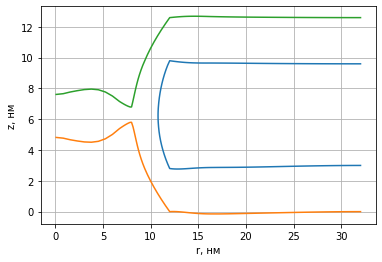

In [ ]:
# def total_graph(data, layer = 'all', number = None, x_label = 'r, Нм', y_label = 'z, Нм')
f_s.total_graph(results, ['lower', 'upper'], data_number)

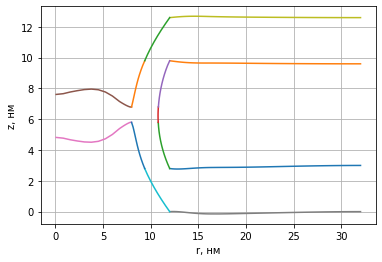

In [ ]:
# sep_graph (data,  layer = 'all', number = None)
f_s.sep_graph(results, ['lower', 'upper'], data_number)

In [ ]:
# save_total_grid(data, number = None, energy_res = None, gen_left_values = None, gen_right_values = [ [None, None], [None, None] ], path = None)
f_s.save_total_grid(results, number = data_number, energy_res = en, gen_left_values = gen_left_values, gen_right_values = gen_right_values)

TypeError: ignored

In [ ]:
# load_total_grid (folder_name)
bebra = f_s.load_total_grid ('Total_grid_')
results = bebra[0]